<a href="https://colab.research.google.com/github/Redwoods/Py/blob/master/pdm2020/my-note/pyz-NLP/NLP_ex01_Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP : 자연어 처리 - 스팸 메일 분류기
- RNN(Vanilla RNN)을 이용한 스팸 분류: https://wikidocs.net/22894
- D1CNN을 이용한 스팸 분류 : https://wikidocs.net/80787

## Data
- 총 샘플의 수 : 5572 -> 5169
    - 0: ham
    - 1: spam

---

## RNN(Vanilla RNN)을 이용한 스팸 메일 분류기
### 스팸 메일 데이터

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load data
# urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')
data.shape

(5572, 5)

In [ ]:
print('총 샘플의 수 :',len(data))
type(data)

총 샘플의 수 : 5572


pandas.core.frame.DataFrame

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- v1열은 해당 메일이 스팸인지 아닌지를 나타내는 레이블에 해당되는 열입니다. 
- ham은 정상 메일을 의미하고, spam은 스팸 메일을 의미합니다. 
- v2열은 메일의 본문을 담고있습니다.
- Unnamed라는 이름의 3개의 열은 텍스트 분류를 할 때 불필요한 열입니다. 

In [ ]:
# 레이블과 메일 내용이 담긴 v1열과 v2열만 필요하므로, Unnamed: 2, Unnamed: 3, Unnamed: 4 열은 삭제.
# v1열에 있는 ham과 spam 레이블을 각각 숫자 0과 1로 변경.

del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info(),data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


(None, (5572, 2))

In [ ]:
#  Null 값을 가진 샘플 검사
data.isnull().values.any()

False

In [ ]:
data.isnull().sum() #axis=0)

v1    0
v2    0
dtype: int64

In [ ]:
# 데이터에 중복이 있지는 않은지 확인
data['v1'].nunique(), data['v2'].nunique()

(2, 5169)

> 총 5,572개의 샘플이 존재하는데 v2열에서 중복을 제거한 샘플의 개수가 5,169개라는 것은 403개의 중복 샘플이 존재

In [ ]:
# 중복 샘플을 제거
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거

# 중복 샘플을 제거 gn, 전체 샘플 수를 확인.
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


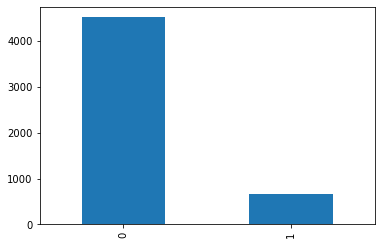

In [ ]:
# 스팸 메일 유무를 의미하는 레이블 값의 분포를 시각화
data['v1'].value_counts().plot(kind='bar');

In [ ]:
#  레이블 값의 분포를 수치로 확인
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


### 데이터 만들기
> v2열을 X, v1열을 y로 저장
- 데이터: X
- 레이블 : y

In [ ]:
data.shape, type(data)

((5169, 2), pandas.core.frame.DataFrame)

In [ ]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


### 토큰화와 정수 인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장


In [ ]:
# Print the first 5 items
for item in sequences[:5]:
  print(item)

[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137]
[49, 306, 1364, 435, 6, 1767]
[53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015]
[6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152]
[935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]


In [ ]:
type(sequences),max(max(sequences))

(list, 8919)

> sequences에는 X_data의 단어들이 각 단어에 맵핑되는 정수로 인코딩되어 저장

In [ ]:
# 각 정수가 어떤 단어에 부여되었는지 확인
word_to_index = tokenizer.word_index
print(type(word_to_index))
print(len(word_to_index))
# first_50 = dict(list(d.items())[:50])
print(dict(list(word_to_index.items())[:50]))

<class 'dict'>
8920
{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50}


In [ ]:
type(word_to_index)

dict

In [ ]:
# 각 단어에 대한 등장 빈도수: tokenizer.word_counts.items()
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


>등장 빈도가 threshold 값인 2회 미만. 즉, 1회 밖에 되지 않는 단어들은 단어 집합에서 무려 절반 이상을 차지합니다. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 6%밖에 되지 않습니다. 만약, 이러한 분석을 통해 등장 빈도가 지나치게 낮은 단어들은 자연어 처리에서 제외하고 싶다면 케라스 토크나이저 선언 시에 단어 집합의 크기를 제한할 수 있었다는 사실을 기억합시다. (정수 인코딩 챕터 참고) 가령, 아래의 코드로 등장 빈도가 1회인 단어들을 제외할 수 있을 겁니다.

- tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)

In [ ]:
# 단어 집합의 크기를 vocab_size에 저장
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


## 훈련 데이터와 테스트 데이터의 분리
- 8:2

In [ ]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


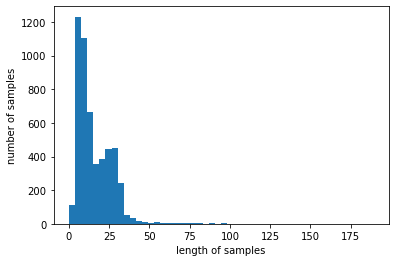

In [ ]:
# X_data에 대해서 정수 인코딩 된 결과인 sequences를 X_data로 변경하고, 
# 전체 데이터에서 가장 길이가 긴 메일과 전체 메일 데이터의 길이 분포를 확인
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# Padding data up to max_len
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data_pad = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data_pad.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [ ]:
# 훈련 데이터와 테스트 데이터를 분리
X_train = data_pad[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장
X_test = data_pad[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4135, 189), (4135,), (1034, 189), (1034,))

## 바닐라 RNN을 이용하여 스팸 메일 분류

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('./models/best_model_RNN.{epoch:02d}-{val_acc:.3f}.h5', 
                        monitor = 'val_acc', mode = 'max', 
                        verbose = 1, save_best_only = True)

history = model.fit(X_train, y_train, 
                    epochs = 10, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[es, mc])

Epoch 1/10
52/52 [==============================] - 20s 363ms/step - loss: 0.3717 - acc: 0.8809 - val_loss: 0.2761 - val_acc: 0.8827

Epoch 00001: val_acc improved from -inf to 0.88271, saving model to ./models\best_model_RNN.01-0.883.h5
Epoch 2/10
52/52 [==============================] - 19s 361ms/step - loss: 0.2371 - acc: 0.9247 - val_loss: 0.2592 - val_acc: 0.8875

Epoch 00002: val_acc improved from 0.88271 to 0.88755, saving model to ./models\best_model_RNN.02-0.888.h5
Epoch 3/10
52/52 [==============================] - 19s 362ms/step - loss: 0.1429 - acc: 0.9565 - val_loss: 0.0894 - val_acc: 0.9770

Epoch 00003: val_acc improved from 0.88755 to 0.97703, saving model to ./models\best_model_RNN.03-0.977.h5
Epoch 4/10
52/52 [==============================] - 19s 367ms/step - loss: 0.0739 - acc: 0.9794 - val_loss: 0.0835 - val_acc: 0.9770

Epoch 00004: val_acc did not improve from 0.97703
Epoch 5/10
52/52 [==============================] - 19s 374ms/step - loss: 0.0372 - acc: 0.9912 

In [ ]:
# 테스트 데이터에 대해서 정확도를 확인.

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 1s 28ms/step - loss: 0.0773 - acc: 0.9787

 테스트 정확도: 0.9787


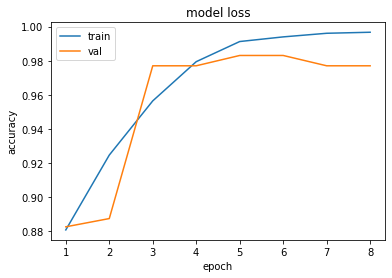

In [ ]:
# 훈련 데이터와 검증 데이터에 대한 정확도 시각화.
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

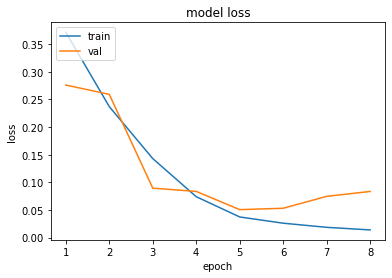

In [ ]:
# 훈련 데이터와 검증 데이터에 대한 손실 시각화.
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

---
---

## 1D CNN으로 스팸 메일 분류

In [ ]:
# 스팸 메일 데이터를 다운로드
# urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
# data = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Redefine data
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


> 전체 단어의 개수를 1,000개로 제한하고 정수 인코딩을 진행

In [ ]:
# 전체 단어의 개수를 1,000~5,000개로 제한하고 정수 인코딩을 진행
vocab_size = 5000   # 1000, 2000, 5000
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [ ]:
# Print the first 5 items
for item in sequences[:5]:
  print(item)

[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137]
[49, 306, 1364, 435, 6, 1767]
[53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015]
[6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152]
[935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]


In [ ]:
type(sequences),max(max(sequences))

(list, 4983)

> 전체 단어의 개수를 제한하지 않은 경우와 1,000개로 제한한 경우를 비교

> ### 전체 단어의 개수를 제한하지 않은 경우
- [47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137]
- [49, 306, 1364, 435, 6, 1767]

> ### 1,000개로 제한
- [47, 433, 780, 705, 662, 64, 8, 94, 121, 434, 142, 68, 57, 137]
- [49, 306, 435, 6]

In [ ]:
# 훈련 데이터와 테스트 데이터의 분리
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)


훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 183
메일의 평균 길이 : 14.851809


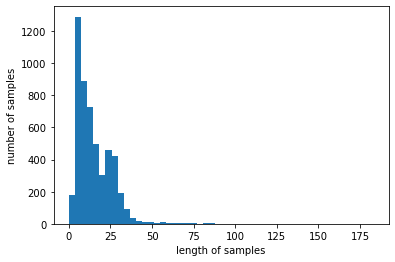

In [ ]:
# 전체 데이터에서 가장 길이가 긴 메일과 전체 메일 데이터의 길이 분포
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
max_len = 172
data_pad = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data_pad.shape)

훈련 데이터의 크기(shape):  (5169, 172)


In [ ]:
# X_train과 X_test를 분리
X_test = data_pad[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data_pad[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장
print("훈련용 이메일 데이터의 크기(shape): ", X_train.shape)
print("테스트용 이메일 데이터의 크기(shape): ", X_test.shape)
print("훈련용 레이블의 크기(shape): ", y_train.shape)
print("테스트용 레이블의 크기(shape): ", y_test.shape)

훈련용 이메일 데이터의 크기(shape):  (4135, 172)
테스트용 이메일 데이터의 크기(shape):  (1034, 172)
훈련용 레이블의 크기(shape):  (4135,)
테스트용 레이블의 크기(shape):  (1034,)


## 1D CNN으로 스팸 메일 분류

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
print(vocab_size)

5000


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, strides=1, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('./models/best_model_D1CNN.{epoch:02d}-{val_acc:.3f}.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

history = model.fit(X_train, y_train, 
                    epochs = 10, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[es, mc])

Epoch 1/10
52/52 [==============================] - 1s 9ms/step - loss: 0.4974 - acc: 0.8437 - val_loss: 0.3854 - val_acc: 0.8730

Epoch 00001: val_acc improved from -inf to 0.87304, saving model to ./models\best_model_D1CNN.01-0.873.h5
Epoch 2/10
52/52 [==============================] - 0s 6ms/step - loss: 0.3783 - acc: 0.8697 - val_loss: 0.3480 - val_acc: 0.8730

Epoch 00002: val_acc did not improve from 0.87304
Epoch 3/10
52/52 [==============================] - 0s 6ms/step - loss: 0.2656 - acc: 0.8897 - val_loss: 0.1364 - val_acc: 0.9686

Epoch 00003: val_acc improved from 0.87304 to 0.96856, saving model to ./models\best_model_D1CNN.03-0.969.h5
Epoch 4/10
52/52 [==============================] - 0s 7ms/step - loss: 0.0697 - acc: 0.9855 - val_loss: 0.0472 - val_acc: 0.9867

Epoch 00004: val_acc improved from 0.96856 to 0.98670, saving model to ./models\best_model_D1CNN.04-0.987.h5
Epoch 5/10
52/52 [==============================] - 0s 7ms/step - loss: 0.0265 - acc: 0.9924 - val_los

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 3ms/step - loss: 0.0500 - acc: 0.9845

 테스트 정확도: 0.9845


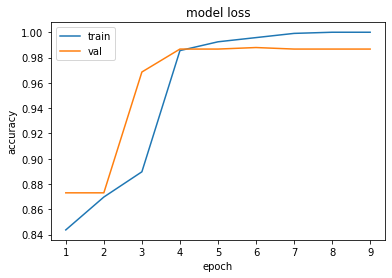

In [ ]:
# 훈련 데이터와 검증 데이터에 대한 정확도 시각화.
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

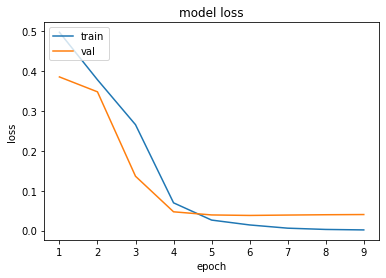

In [ ]:
# 훈련 데이터와 검증 데이터에 대한 손실 시각화.
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

---

## Summary 
- best model 비교

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_test.shape,y_test.shape

((1034, 172), (1034,))

In [ ]:
X_test[:3],y_test[:3]

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0

In [ ]:
# The best model of RNN
model_best_rnn = load_model('./models/best_model_RNN.05-0.987.h5')  
rnn_pred_Best = np.round(model_best_rnn.predict(X_test)).astype(int)
print('Results for the Best RNN Model for SPAM filtering')
print(np.round(accuracy_score(y_test, rnn_pred_Best),2),'%')
print(classification_report(y_test, rnn_pred_Best))

Results for the Best RNN Model for SPAM filtering
0.98 %
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       917
           1       0.99      0.84      0.91       117

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
# The best model of D1CNN
model_best_d1cnn = load_model('./models/best_model_D1CNN.06-0.988.h5')  
d1cnn_pred_Best = np.round(model_best_d1cnn.predict(X_test)) #.astype(int)
print('Results for the Best D1 CNN Model for SPAM filtering')
print(np.round(accuracy_score(y_test, d1cnn_pred_Best),2),'%')
print(classification_report(y_test, d1cnn_pred_Best))

Results for the Best D1 CNN Model for SPAM filtering
0.98 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       917
           1       0.92      0.93      0.93       117

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



---